<b> Objective : Predicting Avocardo Price and Region Correlation

In [23]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#Reading data .csv file
Av_data=pd.read_csv('Avocardo.csv')
Av_data

,row_num,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
# Understanding the datatypes for the column
Av_data.dtypes

row_num           int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here, Type , Region and Date are in Object \String format , whereas Year in integer format. rest all are Float datatype.

Note: row_num column was manually generated in csv file. when i pulled data from GitHub repository there were extra unnamed column (1st) having random numeric value. I termed them as row_num in .csv file which will be dropped during data processing.

In [56]:
#Removing unneccesary columns from the dataframe
Av_data=Av_data.drop(['row_num','Date','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1)
Av_data

,AveragePrice,Total_Volume,Total_Bags,type,year,region
0,1.33,64236.62,8696.87,conventional,2015,Albany
1,1.35,54876.98,9505.56,conventional,2015,Albany
2,0.93,118220.22,8145.35,conventional,2015,Albany
3,1.08,78992.15,5811.16,conventional,2015,Albany
4,1.28,51039.60,6183.95,conventional,2015,Albany
...,...,...,...,...,...,...
1512,1.39,190846.01,59418.46,conventional,2016,Charlotte
1513,1.51,178235.75,63300.70,conventional,2016,Charlotte
1514,1.48,178410.82,62415.77,conventional,2016,Charlotte
1515,1.47,189131.52,63931.73,conventional,2016,Charlotte


In [7]:
Av_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   Total Bags    1517 non-null   float64
 3   type          1517 non-null   object 
 4   year          1517 non-null   int64  
 5   region        1517 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 71.2+ KB


<b> Checking Statistical correlation of the dataset

In [8]:
Av_data.describe()

,AveragePrice,Total Volume,Total Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,2.935974e+05,2015.162821
std,0.188891,4.433143e+06,7.579765e+05,0.369324
min,0.490000,3.875074e+04,3.311770e+03,2015.000000
25%,0.980000,1.474700e+05,3.620689e+04,2015.000000
50%,1.080000,4.027919e+05,7.397906e+04,2015.000000
75%,1.190000,9.819751e+05,1.576097e+05,2015.000000
max,1.680000,4.465546e+07,6.736304e+06,2016.000000


Total Volume and Total Bags have the possibility of outliers.

In [9]:
Av_data.corr()

,AveragePrice,Total Volume,Total Bags,year
AveragePrice,1.000000,-0.140470,-0.111597,0.178683
Total Volume,-0.140470,1.000000,0.967689,-0.004189
Total Bags,-0.111597,0.967689,1.000000,0.090108
year,0.178683,-0.004189,0.090108,1.000000


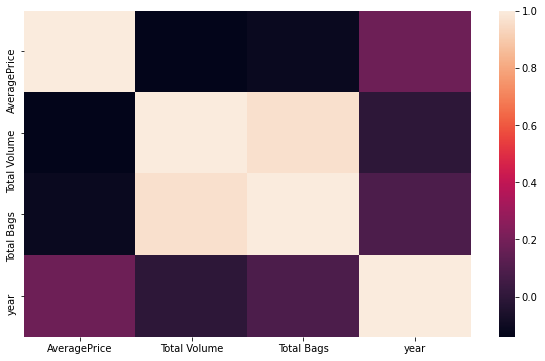

In [13]:
# Heatmap presentation of correlation
plt.figure(figsize=(10,6))
sns.heatmap(Av_data.corr())
plt.show()

Total Bags and Total Volumn are hugely correlated whereas Average price is unexpected uncorrelated with any of the attribute.

<b> Checking for Outliers

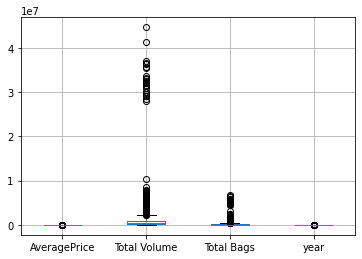

In [15]:
Av_data.boxplot()

For Total Volume, we can see 2 outliers above 4 and few between 2.5 and 3.8.

In [78]:
#Renaming the Volume and Bags columns as space between them is giving error while running the code

Av_data=Av_data.rename(columns={'Total Volume':'Total_Volume','Total Bags':'Total_Bags'})


#Av_data[Av_data.Total_Volume >1]

Av_data.max()

AveragePrice                1.68
Total_Volume         4.46555e+07
Total_Bags            6.7363e+06
type                conventional
year                        2016
region          WestTexNewMexico
dtype: object

In [69]:
Av_data[Av_data.Total_Volume >7990000]


,AveragePrice,Total_Volume,Total_Bags,type,year,region
202,0.88,8567534.49,631798.44,conventional,2015,California
1182,1.02,35734613.90,6464119.81,conventional,2015,TotalUS
1183,0.98,37026085.75,6736304.04,conventional,2015,TotalUS
1184,1.00,36549995.66,6293216.90,conventional,2015,TotalUS
1185,1.03,33720159.09,5713003.39,conventional,2015,TotalUS
1186,1.04,35344183.15,5930474.24,conventional,2015,TotalUS
1187,1.06,32027686.15,5444853.81,conventional,2015,TotalUS
1188,1.02,36400886.58,5818347.73,conventional,2015,TotalUS
1189,0.96,41291704.39,5783173.92,conventional,2015,TotalUS
1190,1.07,30894157.80,5303307.24,conventional,2015,TotalUS


Not sure if these are outliers, as we are taking region wise volume so this much number is expected for a product like Avocardo. Hence, not eliminating any row from the dataset.

Checking data skewness using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD5D259F10>,
      dtype=object)

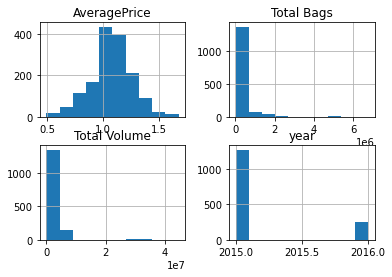

In [16]:
Av_data.hist()

In above graph, Average Price looks normal bell shaped maximum at 1.0 but we can observe Total Bags and Total volume are highly skewed to the left.

<b>Data visualisation

Grouping the data on basis of region to get the collective sum of total quantity sold and total average Price value


In [71]:
grp=Av_data.groupby('region')
x=grp['AveragePrice'].agg(np.sum)


print(x)

region
Albany                 82.99
Atlanta                54.65
BaltimoreWashington    75.46
Boise                  63.37
Boston                 74.74
BuffaloRochester       66.38
California             80.25
Charlotte              40.66
Chicago                27.94
Columbus               47.59
DallasFtWorth          12.85
Denver                 25.94
Detroit                41.65
GrandRapids            26.15
GreatLakes             19.93
HarrisburgScranton     21.99
HartfordSpringfield    15.72
Houston                22.64
Indianapolis           18.02
Jacksonville           45.66
LasVegas               10.41
LosAngeles              2.59
Louisville             35.46
MiamiFtLauderdale      20.00
Midsouth               19.46
Nashville              25.71
NewYork                54.94
Northeast              14.84
NorthernNewEngland     32.22
Orlando                23.80
Philadelphia           16.82
PhoenixTucson          34.31
Pittsburgh             25.93
Plains                 12.62
Portlan

Above is the average price distribution over different regions

Using 'median' while aggregation on 'total_volume' and total bag columns as we had observed that data for these 2 columns is skewed to the left and we use median instead of mean whenever data is skewed to left or right.

In [76]:
y=grp['Total_Volume'].agg(np.median)
print(y)

region
Albany                 7.334173e+04
Atlanta                4.498493e+05
BaltimoreWashington    8.197067e+05
Boise                  8.075129e+04
Boston                 5.530392e+05
BuffaloRochester       1.345225e+05
California             6.089818e+06
Charlotte              1.787885e+05
Chicago                8.035719e+05
Columbus               1.445631e+05
DallasFtWorth          1.207168e+06
Denver                 6.832397e+05
Detroit                3.410183e+05
GrandRapids            1.596428e+05
GreatLakes             3.192869e+06
HarrisburgScranton     2.060741e+05
HartfordSpringfield    2.626386e+05
Houston                1.093425e+06
Indianapolis           1.550261e+05
Jacksonville           1.279391e+05
LasVegas               2.680659e+05
LosAngeles             2.713700e+06
Louisville             7.702359e+04
MiamiFtLauderdale      4.051382e+05
Midsouth               2.342798e+06
Nashville              1.657269e+05
NewYork                1.314052e+06
Northeast            

We can see above, that regions like WestTexNewMexico,BaltimoreWashington,Chicago, Boise are having maximum volume of avocardo consumed than other regions.

In [73]:
z=grp['Total_Bags'].agg(np.median)
print(z)

region
Albany                   10212.700
Atlanta                  63443.750
BaltimoreWashington     185304.240
Boise                    29425.500
Boston                  118226.325
BuffaloRochester         72340.500
California             1595741.280
Charlotte                59418.460
Chicago                  94153.900
Columbus                 23892.680
DallasFtWorth           102359.290
Denver                  108182.110
Detroit                  70247.855
GrandRapids              63493.670
GreatLakes              685814.155
HarrisburgScranton       70932.740
HartfordSpringfield      45108.780
Houston                 120148.780
Indianapolis             40018.255
Jacksonville             31430.840
LasVegas                 36525.640
LosAngeles              255504.050
Louisville               22801.965
MiamiFtLauderdale        78578.590
Midsouth                489067.105
Nashville                28395.270
NewYork                 281919.980
Northeast               933217.820
NorthernNewEn

Similarly, above California and TotalUS are consuming maximum number of bags.

***Confused if this data should be in float or not as it is number of bags and can not be decimal.

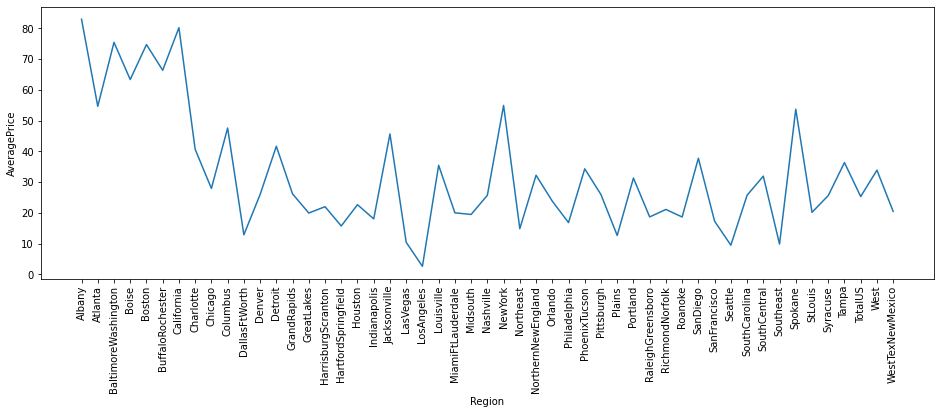

In [80]:
plt.figure(figsize=(16,5))
plt.plot(x)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.show()
#Here the region was overlapping each other and making difficult to understand, so used xticks rotation as 90 which
#made the columns vertical or 90 degree.

Here above, Albany has the highest Average price and LosAngeles has the loweest average Price rest New York is showing balanced price value overall. 


<b>Similarly working with y and z values below to understand their behavior

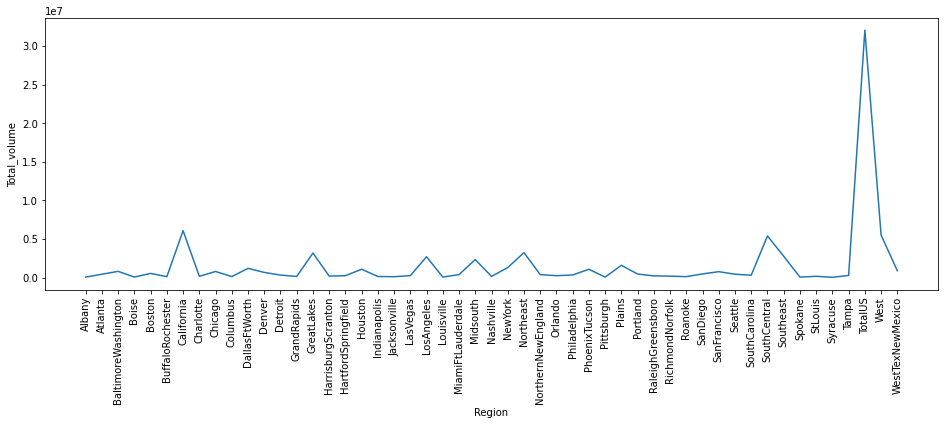

In [83]:
plt.figure(figsize=(16,5))
plt.plot(y)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total_volume')
plt.show()

Again,Highest volume consumed by TotalUS

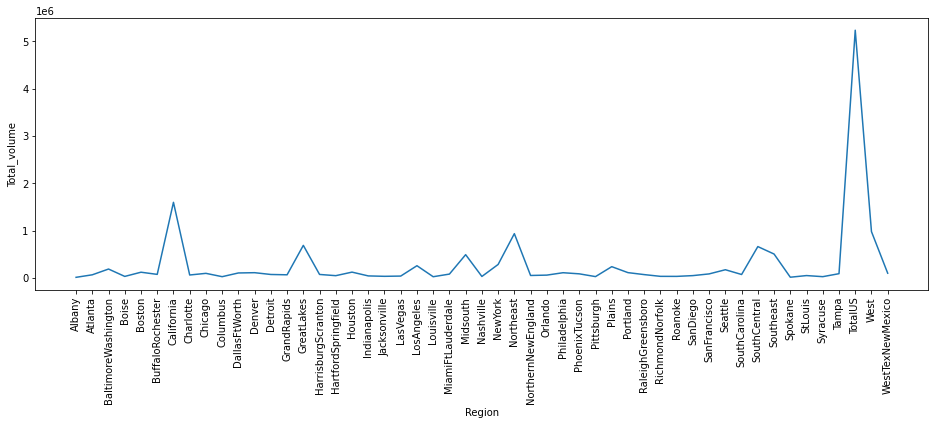

In [85]:
plt.figure(figsize=(16,5))
plt.plot(z)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total_volume')
plt.show()

Here, we can observe y and z plots are lot more similar in terms of number of bags and volume consumed with slight difference for California and Southeast regions.

Understanding the year-wise Price and region distribution using graphs

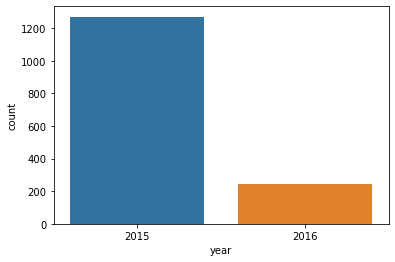

In [87]:
sns.countplot(x='year',data=Av_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

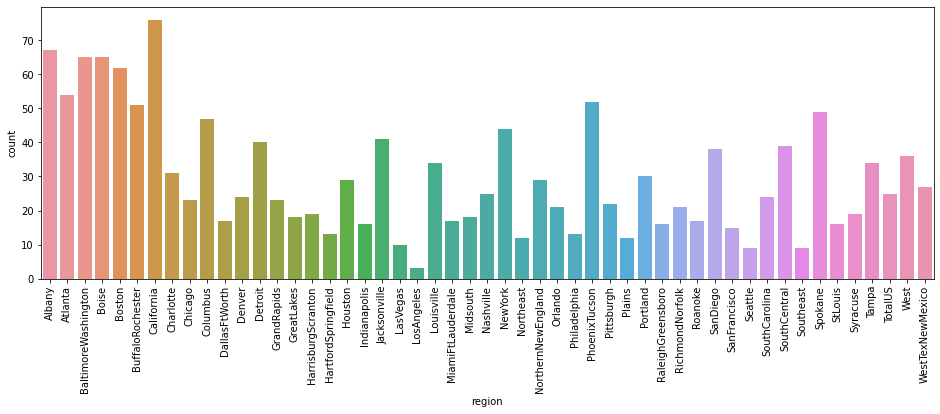

In [90]:
plt.figure(figsize=(16,5))
sns.countplot(x='region',data=Av_data)
plt.xticks(rotation=90)

Highest sales in 2015 and California again showing the highest value overall.

---

<b> Model Training

In [119]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [107]:
Av_data.columns

Index(['AveragePrice', 'Total_Volume', 'Total_Bags', 'type', 'year', 'region'], dtype='object')

In [143]:
y=Av_data['AveragePrice']
x=Av_data.drop(['Total_Bags','Total_Volume','AveragePrice','region','type'],axis=1)
x,y

(      year
 0     2015
 1     2015
 2     2015
 3     2015
 4     2015
 ...    ...
 1512  2016
 1513  2016
 1514  2016
 1515  2016
 1516  2016
 
 [1517 rows x 1 columns],
 0       1.33
 1       1.35
 2       0.93
 3       1.08
 4       1.28
         ... 
 1512    1.39
 1513    1.51
 1514    1.48
 1515    1.47
 1516    1.43
 Name: AveragePrice, Length: 1517, dtype: float64)

In [152]:
Av_data={'2015':0,'2016':1}
Av_data

{'2015': 0, '2016': 1}

In [154]:
# Scaling x-axis because its the value on which value of y-axis (happiness score) depends
scaler = MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,year
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1512,1.0
1513,1.0
1514,1.0
1515,1.0


In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.6)

<b> choosing the best model for our case

In [156]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ', m,'is : ', m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('errors :')
    print('mean_absolute_error ',mean_absolute_error(y_test,predm))
    print('mean_squared_error ', mean_squared_error(y_test,predm))
    print('Root Mean ',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score',r2_score(y_test,predm))
    print('*************************************************************************************')
    print('\n')

score of  LinearRegression() is :  0.0370994426217488
errors :
mean_absolute_error  0.14679576453009466
mean_squared_error  0.03582957655797724
Root Mean  0.18928702163111247
r2_score 0.02229087003056096
*************************************************************************************


score of  DecisionTreeRegressor() is :  0.037099442621749024
errors :
mean_absolute_error  0.14679576453009455
mean_squared_error  0.03582957655797723
Root Mean  0.18928702163111244
r2_score 0.022290870030561516
*************************************************************************************


score of  KNeighborsRegressor() is :  -0.7703622261996077
errors :
mean_absolute_error  0.2199769357495881
mean_squared_error  0.06560121911037889
Root Mean  0.2561273493994323
r2_score -0.7901107694520864
*************************************************************************************


score of  SVR() is :  0.0324543485864186
errors :
mean_absolute_error  0.14581548599673452
mean_squared_error  0.0

Here, Decision Tree best fits the model for Average Pricing Value with accuracy score 1 and less number of error scopes compared to other models.

score of  DecisionTreeRegressor() is :  1.0
errors :
mean_absolute_error  0.11041186161449752
mean_squared_error  0.024165733113673805
Root Mean  0.1554533149008853
r2_score 0.31553688585187345

Hence,Choosing the Decision tree

In [158]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

DecisionTreeRegressor(max_depth=5)

In [159]:
# Predict
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)


<b> Decission Tree Regression Model

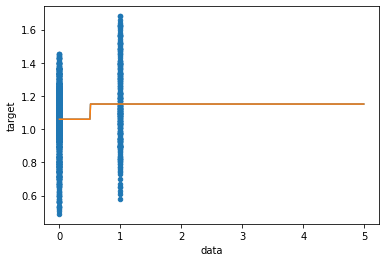

In [162]:
plt.figure()
plt.scatter(x, y, s=20, label="data")
plt.plot(x_test, y_1,
         label="max_depth=2")
plt.plot(x_test, y_2)
plt.xlabel("data")
plt.ylabel("target")
plt.show()

<b> Decision Tree Classification Model

In [169]:
from sklearn.datasets import load_iris
from sklearn import tree
x, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

[Text(446.4, 498.3, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(377.7230769230769, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(515.0769230769231, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(274.7076923076923, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(137.35384615384615, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(68.67692307692307, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(206.03076923076924, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(412.0615384615385, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(343.38461538461536, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(480.73846153846154, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(412.0615384615385, 45.2

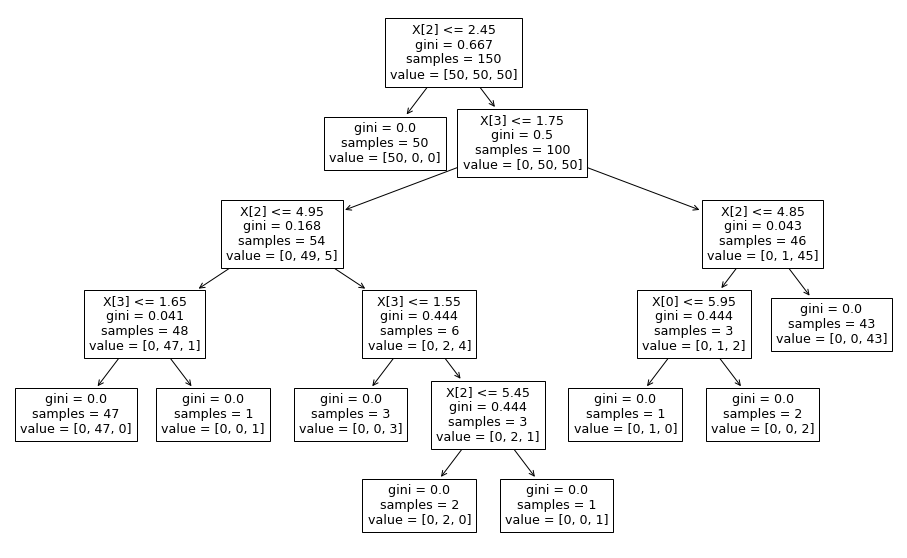

In [172]:
plt.figure(figsize=(16,10))
tree.plot_tree(clf) 
